# In first sction we compute the persistence diagram

In [1]:
# these are the libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import csv
from ripser import ripser
from ripser import Rips

from persim import plot_diagrams
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
from teaspoon.TDA.Draw import drawDgm
from teaspoon.TDA.Persistence import BettiCurve
from teaspoon.TDA.Persistence import CROCKER

from scipy.io import loadmat

from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt7




import pickle
import time
import matplotlib.gridspec as gridspec



from persim import landscapes
from persim import plot_diagrams
from teaspoon.ML import feature_functions as Ff
from teaspoon.ML.feature_functions import PLandscape
from persim.landscapes import PersLandscapeExact


import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

In [ ]:
# load the data generated by matlab of rossler model
file_pathx = 'D:\\PhD_documents\\like to rosller\\like to rosller\\master5.dat'
file_pathy = 'D:\\PhD_documents\\like to rosller\\like to rosller\\slave5.dat'
file_pathz = 'D:\\PhD_documents\\like to rosller\\like to rosller\\zeta5.dat'

xx_v = np.loadtxt(file_pathx)
yy_v = np.loadtxt(file_pathy)
zz_v = np.loadtxt(file_pathz)

# Now 'data' contains the numerical data from the file
print(xx_v)

[ 2.800121   2.7667738  2.7242033 ... -4.207764  -4.2496483 -4.2717319]


In [3]:
merge = np.stack((xx_v[11200:], yy_v[11200:],zz_v[11200:]), axis=1)



In [21]:
res5 = ripser(merge)
pd_d5 = res5['dgms']

pd_0 = pd_d5[0]
pd_1 = pd_d5[1]

In [19]:
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plot_diagrams(pd_d5, lifetime=False)

# Machine learning features

In [6]:
pip install gudhi

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
from gudhi.representations import Landscape
from gudhi.representations import PersistenceImage

1: Persistence Images

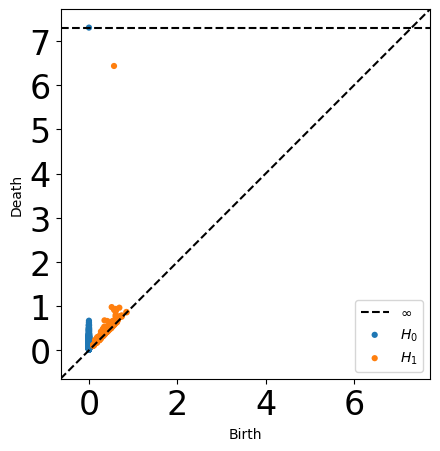

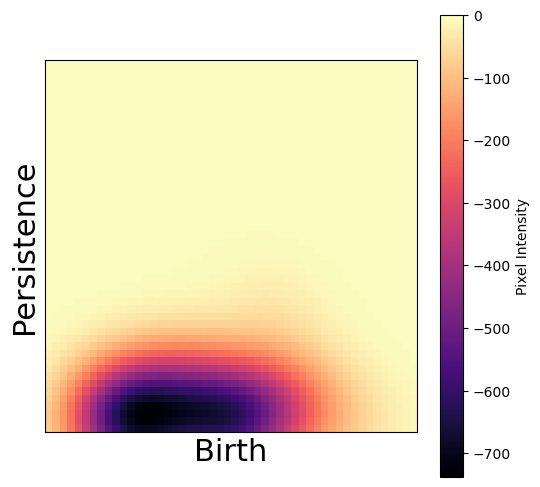

In [22]:


# Assuming `d5` is your persistence diagram in the form [(birth, death), ...]
diags = [pd_1]

# Define persistence image parameters
pixel_size = (50, 50)  # Set as a tuple for a 2D output array
spread = 0.099999      # Spread of the Gaussian kernel

# Initialize PersistenceImage with correct parameters
persistence_image = PersistenceImage(bandwidth=spread, weight=lambda x: x[1] - x[0], 
                                     resolution=pixel_size, im_range=[0, 1, 0, 1])

# Compute persistence images for the diagrams
persistence_images = persistence_image.fit_transform(diags)

plt.figure(figsize=(6, 6))
plt.imshow(persistence_images[0].reshape(pixel_size), cmap='magma', origin='lower')
plt.colorbar(label="Pixel Intensity")
plt.xlabel("Birth", fontsize=22)  # Set x-axis label font size
plt.ylabel("Persistence", fontsize=22)  # Set y-axis label font size

# Remove tick labels
plt.xticks([])  # Hide x-axis tick numbers
plt.yticks([])  # Hide y-axis tick numbers

plt.show()


2: Betti Curves

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def BettiCurve(Dgm, maxEps=3, numStops=10):
    vecOfThresholds = np.linspace(0, maxEps, numStops)
    BettiCurve = np.zeros(np.shape(vecOfThresholds))

    for i, v in enumerate(vecOfThresholds):
        BettiCurve[i] = sum(np.logical_and((Dgm[:, 0] < v), (Dgm[:, 1] > v)))

    return vecOfThresholds, BettiCurve

# Assuming t and x are obtained from BettiCurve(d9, .9, 50)
t, x = BettiCurve(pd_1, .9, 50)

# Plot the step plot with different color and bold line
plt.step(t, x, color='darkorange', linewidth=2)  # Change color and increase line thickness

# Optional: Customize the appearance further
plt.xlabel('Filtration', fontsize=22)  # Bold axis label
plt.ylabel('Betti Number', fontsize=22)  # Bold axis label
#plt.title('Betti Curve', fontsize=18, fontweight='bold')  # Bold title

# Remove axis values (tick labels)
plt.xticks([])  # Hide x-axis tick labels
plt.yticks([])  # Hide y-axis tick labels

# Add caption (optional)
plt.text(0.5, 0.9, 'Betti Curve', transform=plt.gca().transAxes, 
         ha='center', fontsize=14)
# plt.text(0.5, 0.9, transform=plt.gca().transAxes, ha='center', fontsize=14)

# Show the plot with the updated font size and bold styling
plt.show()


TypeError: text() missing 1 required positional argument: 's'

3: persistent Landscape

In [30]:
PLC  = PLandscape(pd_1)
#print(PLC.DesPL)

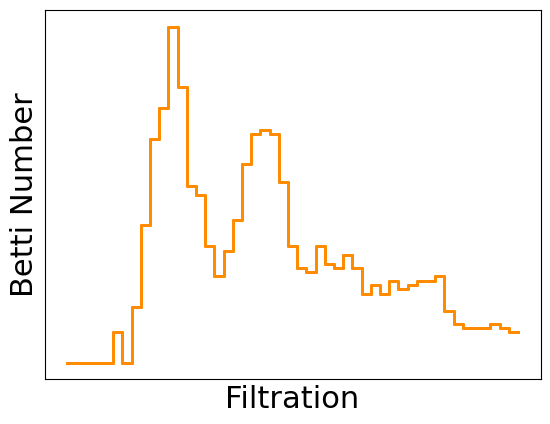

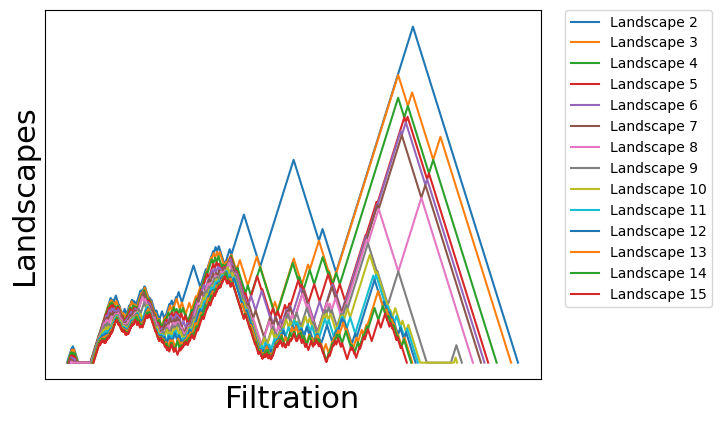

In [31]:
fig = PLC.PLandscape_plot(PLC.AllPL['Points'],[2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax = plt.gca()

# Optional: Customize the appearance further
plt.xlabel('Filtration', fontsize=22)  # Bold axis label
plt.ylabel('Landscapes', fontsize=22)  # Bold axis label
#plt.title('Betti Curve', fontsize=18, fontweight='bold')  # Bold title

# Remove axis values (tick labels)
plt.xticks([])  # Hide x-axis tick labels
plt.yticks([])  # Hide y-axis tick labels

# Increase the font size of the tick labels (axis scale numbers)
ax.tick_params(axis='both', which='major', labelsize=16)  # Adjust the labelsize as needed

# Show the plot with the updated font size
plt.show()
plt.show()

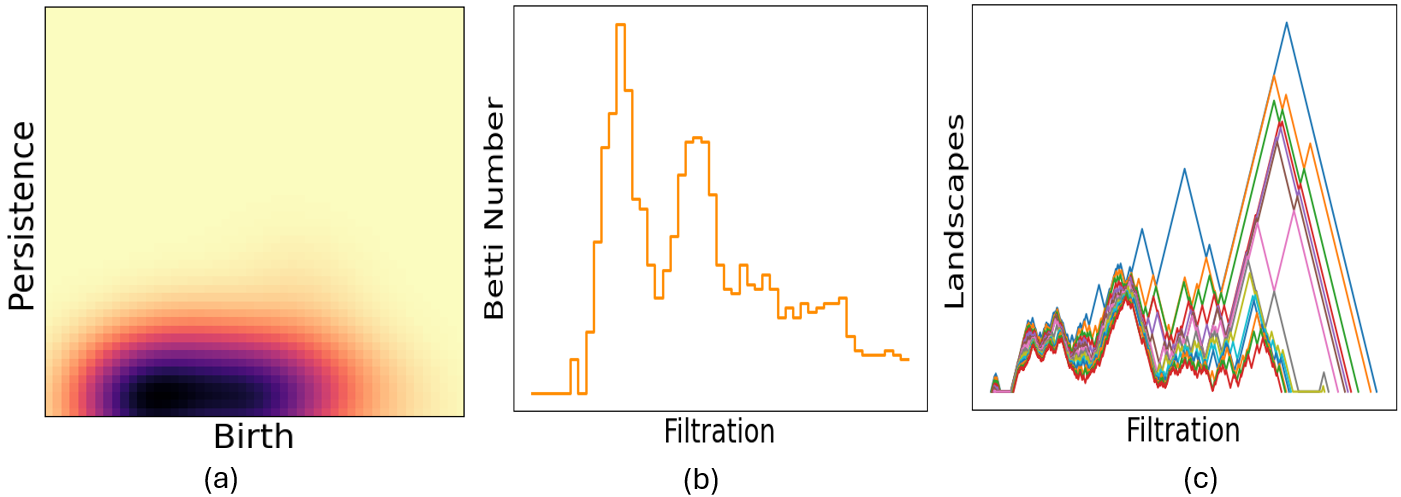